# Exercise 1 - Data processing repetition

In this exercise sheet, you will get repetition of data processing using pandas and graphing.

> [!NOTE]
> These exercises covers lecture 00.

## 0. Supahcoolsoft employee data

In a company `Supahcoolsoft`, there are a lot of employees within data fields.

> [!NOTE]
> This is a synthetic dataset generated by GPT-4o, so the information does not reflect reality.

Read this dataset from the data directory and

a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.

b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

d) Group by different roles and take the median and average salaries for each group.

e) Group by different departments and take the median and average salaries for each group.

f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.

g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.

h) Do some additional analysis of your choice.

In [1]:
#0
#a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.
import pandas as pd
import numpy as np
df = pd.read_csv('../Data/supahcoolsoft.csv') 
df.head()


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   98 non-null     object 
 5   Position     99 non-null     object 
 6   Salary_SEK   99 non-null     float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [3]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
14,E015,Verner,Eriksson,57,NaN,ETL Developer,46264.0,verner.eriksson@supacoolsoft.se,0810-80 56 25
15,E016,Ruth,Eriksson,47,NaN,Machine Learning Engineer,68611.0,ruth.eriksson@supacoolsoft.se,+46 (0)25 21 81 60
24,E025,Erik,Johansson,34,IT,NaN,52931.0,erik.johansson@supacoolsoft.se,08-22 92 07
69,E070,Emma,Kim,48,DevOps,AI Specialist,NaN,emma.kim@supacoolsoft.se,+46 (0)8 354 130 19


In [4]:
etl_developers = df[df['Position'] == 'ETL Developer'] # kollar vilken avdelning som är vanligast för etl dev
etl_developers

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
14,E015,Verner,Eriksson,57,NaN,ETL Developer,46264.0,verner.eriksson@supacoolsoft.se,0810-80 56 25
23,E024,Kajsa,Arvidsson,48,DevOps,ETL Developer,44109.0,kajsa.arvidsson@supacoolsoft.se,091-511 74 71
47,E048,Vilhelm,Erlandsson,57,Engineering,ETL Developer,35084.0,vilhelm.erlandsson@supacoolsoft.se,08-14 69 30
58,E059,David,Karlsson,40,Data Science,ETL Developer,42951.0,david.karlsson@supacoolsoft.se,0076-410 48
65,E066,Viola,Andersson,31,Engineering,ETL Developer,48533.0,viola.andersson@supacoolsoft.se,+46 (0)472 155 43
68,E069,Gunnar,Eriksson,55,Product Management,ETL Developer,53544.0,gunnar.eriksson@supacoolsoft.se,0589-311 37
72,E073,Liam,Wilson,37,Product Management,ETL Developer,39020.0,liam.wilson@supacoolsoft.se,029-397 34 46
80,E081,Sofia,Nielsen,31,IT,ETL Developer,53455.0,sofia.nielsen@supacoolsoft.se,08-929 953 68
91,E092,Mia,Patel,42,Engineering,ETL Developer,44192.0,mia.patel@supacoolsoft.se,+46 (0)501 810 69


In [5]:
mle = df[df['Position'] == 'Machine Learning Engineer'] # kollar vilken avdelning som är vanligast för machine learning engineer
mle

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
11,E012,Cecilia,Magnusson,58,Data Science,Machine Learning Engineer,56154.0,cecilia.magnusson@supacoolsoft.se,0576-83 25 92
15,E016,Ruth,Eriksson,47,NaN,Machine Learning Engineer,68611.0,ruth.eriksson@supacoolsoft.se,+46 (0)25 21 81 60
40,E041,Maria,Garcia,25,DevOps,Machine Learning Engineer,45451.0,maria.garcia@supacoolsoft.se,0571-862 98
46,E047,Patrik,Johansson,49,IT,Machine Learning Engineer,52337.0,patrik.johansson@supacoolsoft.se,+46 (0)81 44 86 32
55,E056,Robert,Jönsson,49,DevOps,Machine Learning Engineer,41548.0,robert.jönsson@supacoolsoft.se,+46 (0)994 940 25
74,E075,Wei,Zhang,32,DevOps,Machine Learning Engineer,68086.0,wei.zhang@supacoolsoft.se,+46 (0)586 920 24
76,E077,Elias,Engström,48,Engineering,Machine Learning Engineer,51275.0,elias.engström@supacoolsoft.se,090-61 85 40
84,E085,Margaretha,Lundin,40,DevOps,Machine Learning Engineer,41833.0,margaretha.lundin@supacoolsoft.se,08-343 45 95


In [6]:
Itpeople = df[df['Department'] == 'IT']
Itpeople

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
24,E025,Erik,Johansson,34,IT,NaN,52931.0,erik.johansson@supacoolsoft.se,08-22 92 07
27,E028,Christina,Svensson,52,IT,Junior Data Scientist,47746.0,christina.svensson@supacoolsoft.se,+46 (0)479 099 78
32,E033,Maria,Garcia,29,IT,Junior Data Scientist,41412.0,maria.garcia@supacoolsoft.se,0613-858 88
35,E036,Niklas,Karlsson,40,IT,Database Administrator,54033.0,niklas.karlsson@supacoolsoft.se,0795-862 69
36,E037,Olivia,Brown,54,IT,BI Developer,52655.0,olivia.brown@supacoolsoft.se,081-63 55 27
39,E040,Emma,Kim,53,IT,AI Specialist,65553.0,emma.kim@supacoolsoft.se,0946-74 42 27
45,E046,Liam,Wilson,57,IT,Senior Data Analyst,52336.0,liam.wilson@supacoolsoft.se,+46 (0)74 98 17 56
46,E047,Patrik,Johansson,49,IT,Machine Learning Engineer,52337.0,patrik.johansson@supacoolsoft.se,+46 (0)81 44 86 32


In [7]:
it_people_sorted = Itpeople.sort_values(by='Position')
it_people_sorted

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
39,E040,Emma,Kim,53,IT,AI Specialist,65553.0,emma.kim@supacoolsoft.se,0946-74 42 27
36,E037,Olivia,Brown,54,IT,BI Developer,52655.0,olivia.brown@supacoolsoft.se,081-63 55 27
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
50,E051,Mia,Patel,41,IT,Data Scientist,57326.0,mia.patel@supacoolsoft.se,+46 (0)39 27 25 65
35,E036,Niklas,Karlsson,40,IT,Database Administrator,54033.0,niklas.karlsson@supacoolsoft.se,0795-862 69
80,E081,Sofia,Nielsen,31,IT,ETL Developer,53455.0,sofia.nielsen@supacoolsoft.se,08-929 953 68
92,E093,Mia,Patel,42,IT,Junior Data Analyst,33401.0,mia.patel@supacoolsoft.se,083-946 68 56
93,E094,Fatima,Khan,35,IT,Junior Data Analyst,36776.0,fatima.khan@supacoolsoft.se,007-70 46 39
27,E028,Christina,Svensson,52,IT,Junior Data Scientist,47746.0,christina.svensson@supacoolsoft.se,+46 (0)479 099 78
32,E033,Maria,Garcia,29,IT,Junior Data Scientist,41412.0,maria.garcia@supacoolsoft.se,0613-858 88


In [8]:
devops_ai_specialists = df[(df['Department'] == 'DevOps') & (df['Position'] == 'AI Specialist')]
devops_ai_specialists


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
60,E061,Margareta,Berglund,28,DevOps,AI Specialist,69356.0,margareta.berglund@supacoolsoft.se,088-747 36 50
69,E070,Emma,Kim,48,DevOps,AI Specialist,NaN,emma.kim@supacoolsoft.se,+46 (0)8 354 130 19


In [9]:
mean_salary = devops_ai_specialists['Salary_SEK'].mean()
print(mean_salary)

68176.0


In [10]:
# b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

# lägger in e015 och e016 på andra avdelningar
df.loc[df['EmployeeID'] == 'E015', 'Department'] = 'Engineering' 
df.loc[df['EmployeeID'] == 'E016', 'Department'] = 'DevOps'
# lägger till e025 som senior data analyst då den är verkar vara vanligast.
df.loc[df['EmployeeID'] == 'E025', 'Position'] = 'Senior Data Analyst'
# lägger in medellön på sista saknade baserat på de andra ai specialisterna i devops avdelningen
df.loc[(df['EmployeeID'] == 'E070'), 'Salary_SEK'] = mean_salary





In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   100 non-null    object 
 5   Position     100 non-null    object 
 6   Salary_SEK   100 non-null    float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [23]:
df.to_csv("../data/supahcoolsoftcleaned.csv")
df

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
...,...,...,...,...,...,...,...,...,...
95,E096,Erik,Höglund,55,Data Science,Junior Data Engineer,42590.0,erik.höglund@supacoolsoft.se,+46 (0)8 454 503 87
96,E097,Fatima,Khan,26,Engineering,BI Developer,42809.0,fatima.khan@supacoolsoft.se,08-677 430 60
97,E098,Gunnel,Olofsson,27,Engineering,Senior Data Engineer,62630.0,gunnel.olofsson@supacoolsoft.se,+46 (0)35 20 46 36
98,E099,Wei,Zhang,43,Product Management,Senior Data Analyst,52075.0,wei.zhang@supacoolsoft.se,+46 (0)490 722 64


In [12]:
# c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

mean_salary_all = df['Salary_SEK'].mean()
median_salary_all = df['Salary_SEK'].median()
min_salary = df['Salary_SEK'].min()
max_salary = df['Salary_SEK'].max()
percentile_10 = df['Salary_SEK'].quantile(0.10)
percentile_90 = df['Salary_SEK'].quantile(0.90)
print(f"Mean: {mean_salary_all}, Median: {median_salary_all}, Min: {min_salary}, max: {max_salary}, 10%: {percentile_10}, 90%: {percentile_90}")


Mean: 52210.45, Median: 52925.0, Min: 30452.0, max: 69742.0, 10%: 36563.8, 90%: 67249.90000000001


In [13]:
df.head(10)


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
7,E008,Astrid,Persson,50,Data Science,Data Scientist,36364.0,astrid.persson@supacoolsoft.se,08-025 34 57
8,E009,Britt,Johansson,47,Engineering,BI Developer,53078.0,britt.johansson@supacoolsoft.se,+46 (0)107 752 69
9,E010,Ove,Larsson,54,Data Science,Junior Data Engineer,44542.0,ove.larsson@supacoolsoft.se,001-648 30 01


In [14]:
# d) Group by different roles and take the median and average salaries for each group.
unique_positions = df['Position'].unique()
print(unique_positions)

['AI Specialist' 'Database Administrator' 'Data Scientist'
 'Junior Data Scientist' 'Senior Data Analyst' 'BI Developer'
 'Junior Data Engineer' 'Machine Learning Engineer' 'ETL Developer'
 'Senior Data Scientist' 'Big Data Engineer' 'Junior Data Analyst'
 'Senior Data Engineer' 'Data Architect']


In [15]:
# Grupperar på Position med hjälp av .groupby() 
# agg(['median', 'mean']) Använder agg()-metoden för att tillämpa flera aggregeringsfunktioner (median och medelvärde) på de grupperade datagrupperna.
# ['median', 'mean']: Specificerar att man vill beräkna både medianen och medelvärdet för Salary_SEK i varje grupp.
salary_stats = df.groupby('Position')['Salary_SEK'].agg(['median', 'mean'])
print(salary_stats)

                            median          mean
Position                                        
AI Specialist              64744.0  62904.888889
BI Developer               48608.5  48276.000000
Big Data Engineer          57958.0  57958.000000
Data Architect             60572.0  59525.600000
Data Scientist             51919.0  51722.333333
Database Administrator     48482.0  47706.800000
ETL Developer              44192.0  45239.111111
Junior Data Analyst        34877.5  35195.300000
Junior Data Engineer       41905.0  40000.200000
Junior Data Scientist      43595.5  43813.125000
Machine Learning Engineer  51806.0  53161.875000
Senior Data Analyst        56303.0  58072.636364
Senior Data Engineer       65740.0  64918.750000
Senior Data Scientist      65526.0  64451.857143


In [16]:
# e) Group by different departments and take the median and average salaries for each group.

salary_stats_dep = df.groupby('Department')['Salary_SEK'].agg(['median', 'mean'])
print(salary_stats_dep)


                     median          mean
Department                               
Data Science        47256.5  50978.625000
DevOps              49129.0  52695.428571
Engineering         48482.0  48321.714286
IT                  53193.0  53585.062500
Product Management  53772.0  54871.769231


In [17]:
# f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.
data_engineers_df = df[df['Position'].str.contains('Data Engineer')]
data_engineers_df

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
9,E010,Ove,Larsson,54,Data Science,Junior Data Engineer,44542.0,ove.larsson@supacoolsoft.se,001-648 30 01
10,E011,Fatima,Khan,41,DevOps,Junior Data Engineer,33563.0,fatima.khan@supacoolsoft.se,0103-338 33
17,E018,Gustaf,Jönsson,50,Product Management,Junior Data Engineer,41905.0,gustaf.jönsson@supacoolsoft.se,08-938 153 46
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
30,E031,Lennart,Dahlberg,55,DevOps,Senior Data Engineer,65831.0,lennart.dahlberg@supacoolsoft.se,08-249 500 00
34,E035,Margareta,Lilja,34,Data Science,Senior Data Engineer,67163.0,margareta.lilja@supacoolsoft.se,051-48 58 04
49,E050,Maria,Garcia,56,DevOps,Big Data Engineer,55337.0,maria.garcia@supacoolsoft.se,+46 (0)152 731 00
52,E053,Sophia,Martinez,59,Product Management,Senior Data Engineer,61093.0,sophia.martinez@supacoolsoft.se,08-081 47 09
54,E055,Sophia,Martinez,39,Product Management,Senior Data Engineer,65649.0,sophia.martinez@supacoolsoft.se,08-989 394 08
66,E067,Gun,Jakobsson,60,Data Science,Senior Data Engineer,66441.0,gun.jakobsson@supacoolsoft.se,+46 (0)573 836 26


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrerar df för att endast behålla rader där jobbtiteln innehåller "Data Engineer".
# Grupperar de filtrerade raderna efter jobbtitel.
# Beräknar medellönen (mean()) för varje jobbtitel.
# Återställer tabellens index så att resultaten är i en ny DataFrame med ett ordnat format.

data_engineers_avg_df = df[df['Position'].str.contains('Data Engineer')].groupby('Position')['Salary_SEK'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Salary_SEK', y='Position', data=data_engineers_df, palette='viridis')

plt.title('Average Salaries of Data Engineer Roles')
plt.xlabel('Average Salary (SEK)')
plt.ylabel('Position')

plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data_engineers_avg_df

,Position,Salary_SEK
0,Big Data Engineer,57958.00
1,Junior Data Engineer,40000.20
2,Senior Data Engineer,64918.75


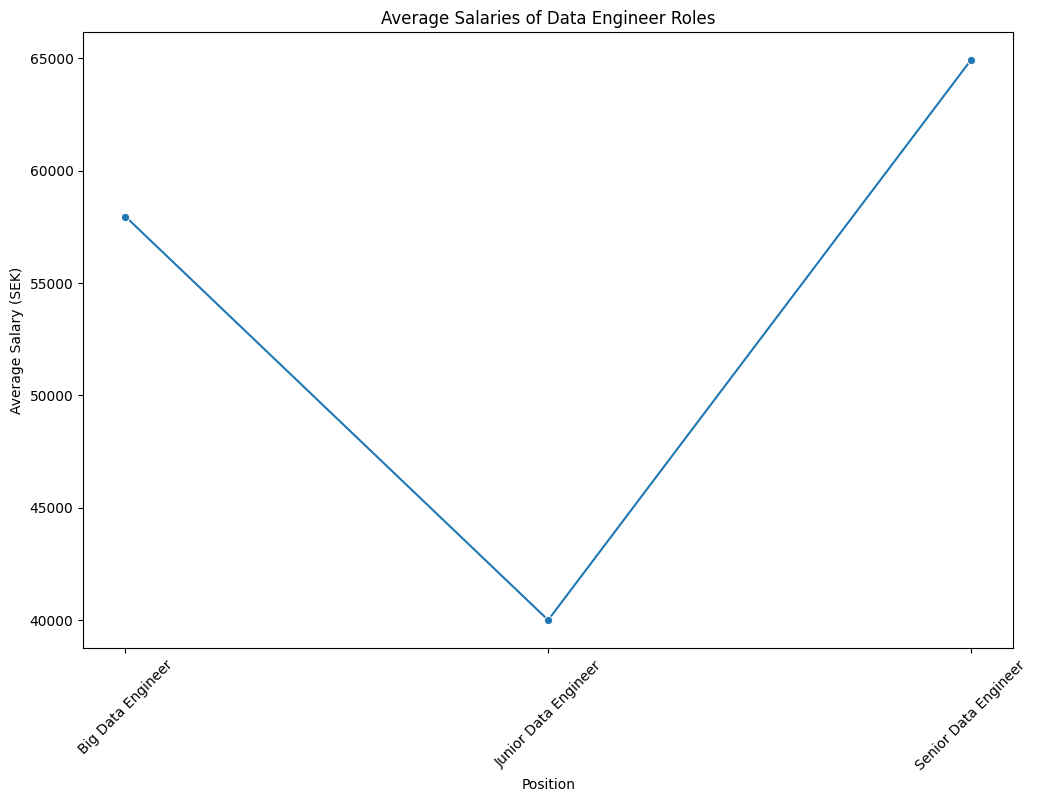

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Position', y='Salary_SEK', data=data_engineers_avg_df, marker='o')

plt.title('Average Salaries of Data Engineer Roles')
plt.xlabel('Position')
plt.ylabel('Average Salary (SEK)')
plt.xticks(rotation=45)  # För att göra x-axel etiketter läsliga

plt.show()

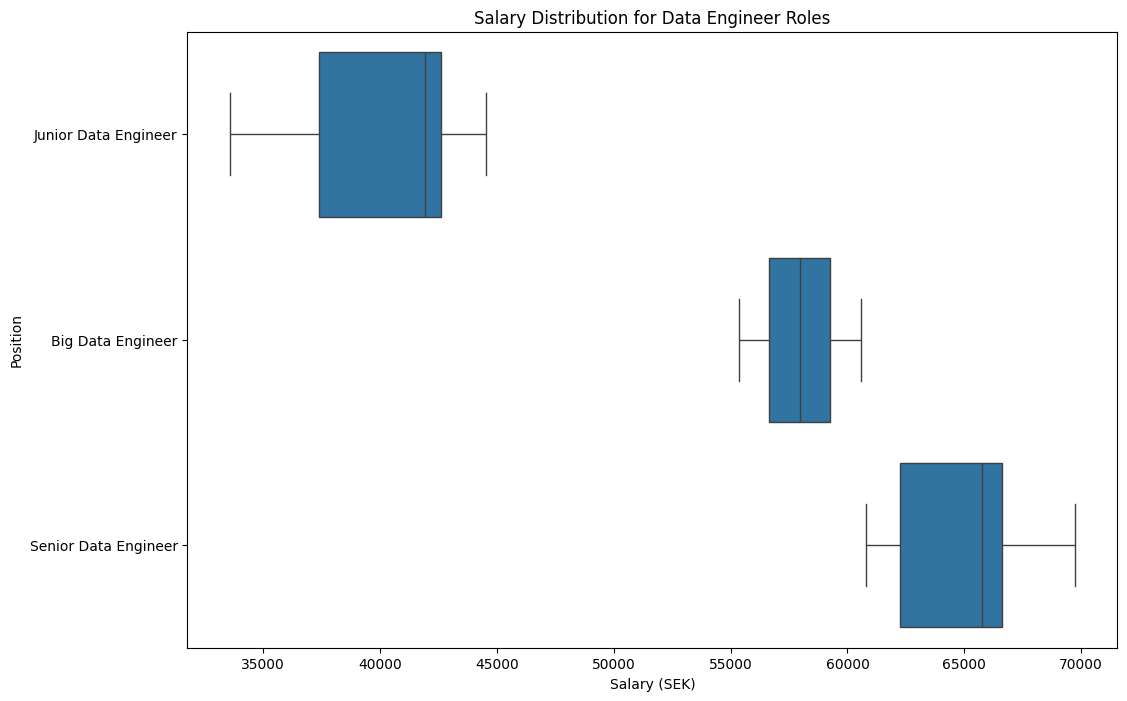

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary_SEK', y='Position', data=df[df['Position'].str.contains('Data Engineer')])

plt.title('Salary Distribution for Data Engineer Roles')
plt.xlabel('Salary (SEK)')
plt.ylabel('Position')

plt.show()

In [ ]:
# g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.
# 33000-35000 i lön medel är 35000

junior_data_analyst = df[df['Position'].str.contains('Junior Data Analyst')]['Salary_SEK']
junior_data_analyst

29    34687.0
42    39892.0
43    37471.0
48    35068.0
57    30452.0
61    32045.0
70    33983.0
77    38178.0
92    33401.0
93    36776.0
Name: Salary_SEK, dtype: float64

In [ ]:
#medelvärde junior data analyst
mean_jun_dat_anal = df[df['Position'].str.contains('Junior Data Analyst')]['Salary_SEK'].mean()
print(mean_jun_dat_anal)

35195.3


In [ ]:
# medelvärde på alla data analysts
data_analysts = df[df['Position'].str.contains('Data Analyst')]['Salary_SEK'].mean()
print(data_analysts)

47178.666666666664


## 1. Olympic games in Paris 2024

Here is the [wikipedia page for olympic games in paris 2024](https://en.wikipedia.org/wiki/2024_Summer_Olympics). We will use it for some data analysis. We'll use pandas `pd.read_html()` to scrape different tables in this site.

&nbsp; a) How many sports are represented in total?

For b,c,d it's good to make functions that can be reused.

&nbsp; b) Make a bar chart over the top five countries in medal count.

&nbsp; c) Make a bar chart over the top five countries in gold medal count.

&nbsp; d) Choose a sport from and and make a bar chart over top five countries.

Note that there are several tables that need to be considered for these tasks and some data cleaning are required.

&nbsp; e) How many venues are there in total?

&nbsp; f) How many venues were built for the games?

&nbsp; g) How much capacity does this correspond to?

&nbsp; h) How much percentage of capacity does this correspond to in total?

In [ ]:

df_os = pd.read_html('https://en.wikipedia.org/wiki/2024_Summer_Olympics#Medal_table')
df_os_medals = pd.read_html('https://en.wikipedia.org/wiki/2024_Summer_Olympics#Medal_table')[12]
df_os_medals

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64
5,6,Netherlands,15,7,12,34
6,7,Great Britain,14,22,29,65
7,8,South Korea,13,9,10,32
8,9,Italy,12,13,15,40
9,10,Germany,12,13,8,33


In [ ]:
df_os_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    12 non-null     object
 1   NOC     12 non-null     object
 2   Gold    12 non-null     int64 
 3   Silver  12 non-null     int64 
 4   Bronze  12 non-null     int64 
 5   Total   12 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 708.0+ bytes


In [ ]:

df_os_medals_top5 = df_os_medals.head(5)
df_os_medals_top5

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


In [ ]:
# filtrerar bort övriga 
df_filtered = df_os_medals[~df_os_medals['NOC'].isin(['Remaining NOCs', 'Totals (91 entries)'])]

# sorterar på total
df_os_medals_sorted = df_filtered.sort_values(by='Total', ascending=False)

df_os_medals_sorted_gold = df_filtered.sort_values(by='Gold', ascending=False).head(5)

# tar ut de 5 länder med flest medaljer
df_os_medals_top5 = df_os_medals_sorted.head(5)

# tar ut de länder med flest guld
df_os_medals_gold = df_os_medals_sorted_gold.head(5)

df_os_medals_gold



,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


In [ ]:
df_os_medals_top5

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
6,7,Great Britain,14,22,29,65
4,5,France*,16,26,22,64
3,4,Australia,18,19,16,53


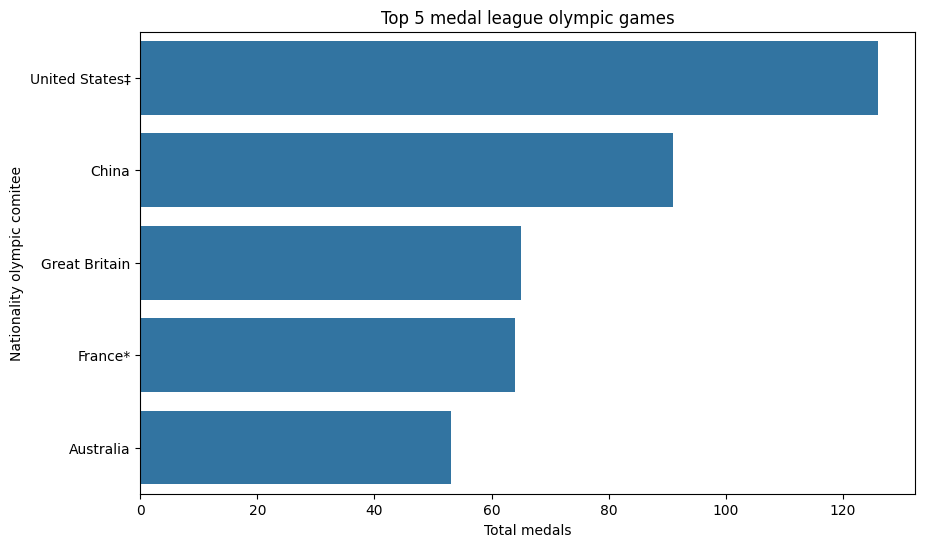

In [ ]:
# a) ????

# b) b) Make a bar chart over the top five countries in medal count.

plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='NOC', data=df_os_medals_top5)

plt.title('Top 5 medal league olympic games')
plt.xlabel('Total medals')
plt.ylabel('Nationality olympic comitee')

plt.show()



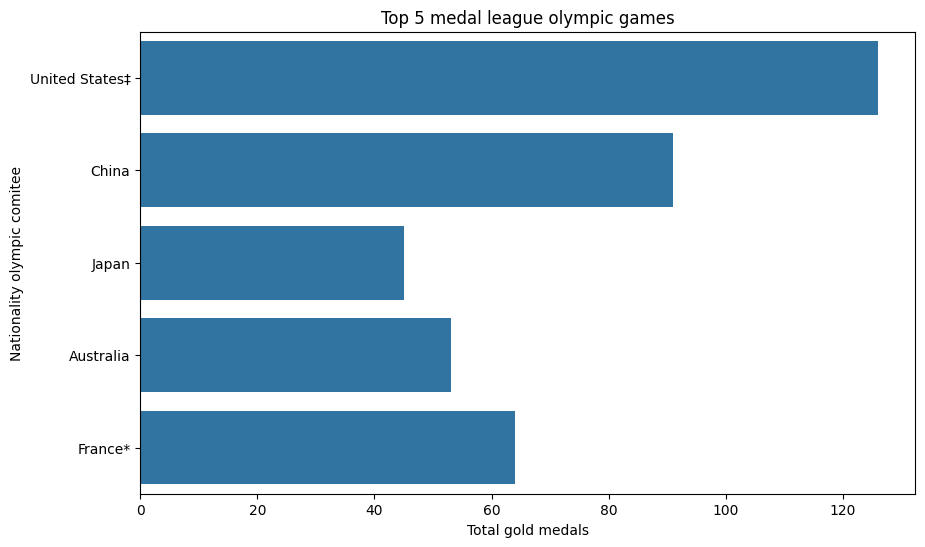

In [ ]:
#c) c) Make a bar chart over the top five countries in gold medal count.

plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='NOC', data=df_os_medals_gold)

plt.title('Top 5 medal league olympic games')
plt.xlabel('Total gold medals')
plt.ylabel('Nationality olympic comitee')

plt.show()


In [ ]:
print(df_os_medals_gold)

  Rank             NOC  Gold  Silver  Bronze  Total
0    1  United States‡    40      44      42    126
1    2           China    40      27      24     91
2    3           Japan    20      12      13     45
3    4       Australia    18      19      16     53
4    5         France*    16      26      22     64


In [ ]:
# d) Choose a sport from and and make a bar chart over top five countries.

df_os_archery = pd.read_html ('https://en.wikipedia.org/wiki/Archery_at_the_2024_Summer_Olympics')[4]
df_os_archery

# rensar bort totala medaljer av alla och tar 5 översta 
df_filtered_arch = df_os_archery[~df_os_archery['NOC'].isin(['Totals (7 entries)'])].head(5)
df_filtered_arch


,Rank,NOC,Gold,Silver,Bronze,Total
0,1,South Korea,5,1,1,7
1,2,France*,0,1,1,2
2,2,United States,0,1,1,2
3,4,China,0,1,0,1
4,4,Germany,0,1,0,1


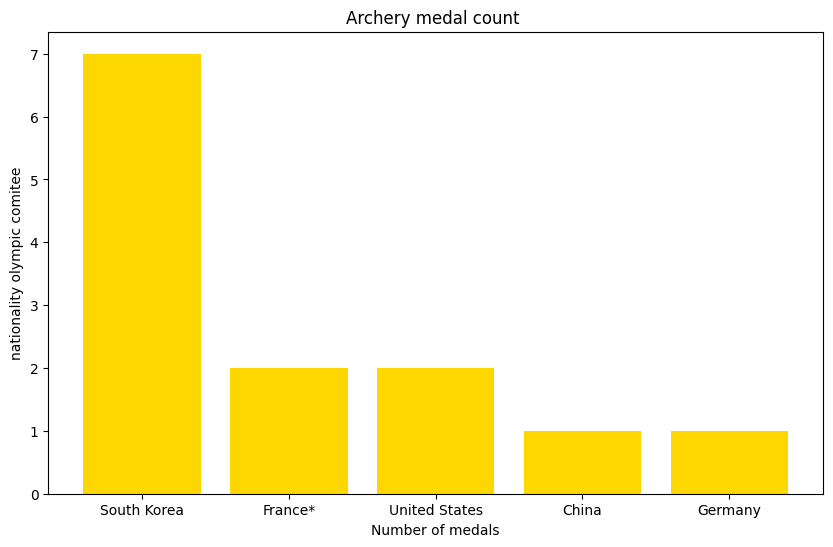

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_filtered_arch['NOC'], df_filtered_arch['Total'], color= 'gold' )
plt.title('Archery medal count ')
plt.xlabel('Number of medals')
plt.ylabel('nationality olympic comitee')
plt.show()

In [ ]:
# e) How many venues are there in total?

print(f"Antal tabeller: {len(df_os)}")
for i, table in enumerate(df_os):
    print(f"Tabell {i} - Första rader:")
    print(table.head())



Antal tabeller: 27
Tabell 0 - Första rader:
                                    0  \
0  Emblem of the 2024 Summer Olympics   
1                            Location   
2                               Motto   
3                             Nations   
4                            Athletes   

                                                   1  
0                 Emblem of the 2024 Summer Olympics  
1                                      Paris, France  
2  Games Wide Open (French: Ouvrons Grand les Jeu...  
3               204 (including AIN and Refugee Team)  
4                                              10714  
Tabell 1 - Första rader:
                                                   0
0                                Part of a series on
1                               2024 Summer Olympics
2  Bid process (bid details) Development (venues,...
3                                                vte
Tabell 2 - Första rader:
          City         Nation                  Votes
0        Pa

In [ ]:
df_ven1 = df_os[3]
df_ven2 = df_os[4]
df_ven3 = df_os[5]
df_ven4 = df_os[6]
df_ven5 = df_os[7]

combined_df = pd.concat([df_ven1, df_ven2, df_ven3, df_ven4, df_ven5], ignore_index=True)

combined_df

,Venue,Events,Capacity,Status,Ref.
0,Yves du Manoir Stadium,Field hockey,15000,Renovated,[29]
1,Stade de France,Rugby sevens,77083,Existing,[30]
2,Stade de France,Athletics (track and field),77083,Existing,[30]
3,Stade de France,Closing ceremony,77083,Existing,[30]
4,Paris La Défense Arena,"Aquatics (swimming, water polo finals)",15220,Existing,[31]
...,...,...,...,...,...
62,"Parc de l'Aire des Vents, Dugny",Media Village,—,Temporary,NaN
63,Le Bourget Exhibition Centre and Media Village...,International Broadcast Centre,15000,Existing,NaN
64,Paris Congress Centre,Main Press Centre,—,Existing,NaN
65,Polygone de Vincennes [fr],Road cycling training venue,—,Existing,NaN


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Venue     67 non-null     object
 1   Events    67 non-null     object
 2   Capacity  67 non-null     object
 3   Status    67 non-null     object
 4   Ref.      11 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
df_dropped_cols = combined_df.dropna(axis=1)
df_dropped_cols

,Venue,Events,Capacity,Status
0,Yves du Manoir Stadium,Field hockey,15000,Renovated
1,Stade de France,Rugby sevens,77083,Existing
2,Stade de France,Athletics (track and field),77083,Existing
3,Stade de France,Closing ceremony,77083,Existing
4,Paris La Défense Arena,"Aquatics (swimming, water polo finals)",15220,Existing
...,...,...,...,...
62,"Parc de l'Aire des Vents, Dugny",Media Village,—,Temporary
63,Le Bourget Exhibition Centre and Media Village...,International Broadcast Centre,15000,Existing
64,Paris Congress Centre,Main Press Centre,—,Existing
65,Polygone de Vincennes [fr],Road cycling training venue,—,Existing


In [ ]:
# e) How many venues are there in total? 43 stycken

unique_venues = df_dropped_cols['Venue'].unique()
len(unique_venues)


43

In [ ]:
#  f) How many venues were built for the games? 4 st

build_venues = df_dropped_cols['Status'] == 'Built for the Games'
print(df_dropped_cols[build_venues])

                         Venue  \
5   Porte de La Chapelle Arena   
6   Porte de La Chapelle Arena   
7         Paris Aquatic Centre   
60             Olympic Village   

                                               Events         Capacity  \
5                                           Badminton             8000   
6                               Gymnastics (rhythmic)             8000   
7   Aquatics (water polo preliminaries, diving, ar...             5000   
60                                    Olympic Village  18,000 athletes   

                 Status  
5   Built for the Games  
6   Built for the Games  
7   Built for the Games  
60  Built for the Games  


In [ ]:
count_built_venues = build_venues.sum()
print(count_built_venues)

4


In [ ]:
# g) How much capacity does this correspond to?
built_capacity = df_dropped_cols[build_venues]

built_capacity


,Venue,Events,Capacity,Status
5,Porte de La Chapelle Arena,Badminton,8000,Built for the Games
6,Porte de La Chapelle Arena,Gymnastics (rhythmic),8000,Built for the Games
7,Paris Aquatic Centre,"Aquatics (water polo preliminaries, diving, ar...",5000,Built for the Games
60,Olympic Village,Olympic Village,"18,000 athletes",Built for the Games


In [ ]:
built_capacity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 5 to 60
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Venue     4 non-null      object
 1   Events    4 non-null      object
 2   Capacity  4 non-null      object
 3   Status    4 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


In [ ]:
def clean_capacity(value):
    try:
        # Om det är en sträng, ta bort icke-numeriska tecken och konvertera till int
        if isinstance(value, str):
            return int(value.replace(',', '').split()[0])
        # Om det redan är ett numeriskt värde, returnera det som det är
        else:
            return value
    except ValueError:
        # Hantera fall där konvertering inte är möjlig (t.ex. om värdet är '—')
        return 0  # eller använd `None` om du vill exkludera dessa från summeringen

# Använd funktionen på 'Capacity'-kolumnen
#: förekommer i raden inom loc[], vilket betyder "välj alla rader".
# Metoden .apply() används för att tillämpa en funktion på varje element i en Pandas Series (i detta fall kolumnen 'Capacity').
built_capacity.loc[:, 'Capacity'] = built_capacity['Capacity'].apply(clean_capacity)

# Summera kapaciteten
total_capacity = built_capacity['Capacity'].sum()
print(f'Total capacity: {total_capacity}')


Total capacity: 39000


In [ ]:
# h) How much percentage of capacity does this correspond to in total?

df_dropped_cols.loc[:, 'Capacity'] = df_dropped_cols['Capacity'].apply(clean_capacity)
total_capacity_all = df_dropped_cols['Capacity'].sum()
print(f'Total capacity: {total_capacity_all}')


Total capacity: 2027914


In [ ]:
percentage_venues = (total_capacity / total_capacity_all) * 100

print(f"it corresponds to: {percentage_venues}% of the total capacity")

it corresponds to: 1.923158477134632% of the total capacity


## 2. Working with livsmedelsverkets API

Livsmedelsverket provides an open API for accessing data on different food and their nutritional contents and more. Access the [documentation of this API here](https://dataportal.livsmedelsverket.se/livsmedel/swagger/index.html).

&nbsp; a) Go into different sections and click `Try it out` to try out the API, and you'll get the request URL links.

&nbsp; b) Now go into this endpoint `/api/v{version}/livsmedel/{nummer}` and try it out to find its request URL.

&nbsp; c) Use requests in python to try out this API endpoint and request a few data points.

&nbsp; d) Now find a number and find and print out its corresponding nutrient values. Example for number 10. Filter out all nutrients that are 0. 

```
Namn
Flytande margarin fett 82% berikad typ Milda culinesse

Näringsvärden
Vitamin E                               23.7mg
Vitamin D                               7.5µg
Vitamin A                               693.1RE/µg
Vatten                                  16.7g
Retinol                                 645.0µg
Summa fleromättade fettsyror            28.7g
Salt, NaCl                              1.5g
Natrium, Na                             600mg
Summa enkelomättade fettsyror           42.5g
Summa mättade fettsyror                 7.3g
Fett, totalt                            82.0g
Energi (kJ)                             3034kJ
Energi (kcal)                           725kcal
Arakidinsyra C20:0                      0.6g
Linolensyra C18:3                       8.8g
Linolsyra C18:2                         19.8g
Oljesyra C18:1                          41.0g
Stearinsyra C18:0                       2.1g
Palmitoljesyra C16:1                    0.2g
Palmitinsyra C16:0                      3.6g
Myristinsyra C14:0                      0.1g
Betakaroten/β-Karoten                   577µg
Aska                                    1.3g
```

This requires some more steps, but can be fun to explore. 

&nbsp; e) Make a dictionary of names as key and number as value. Then implement embeddings that finds closest distance between two strings. Now you can search for a specific food and find the closest one in your dictionary. Use the value that is a number and search for its corresponding nutrients. 

In [ ]:
# c,d )

import requests
import pandas as pd

# URL till API-endpunkten för att hämta näringsvärden
url = "https://dataportal.livsmedelsverket.se/livsmedel/api/v1/livsmedel/12/naringsvarden?sprak=1"

# Försöker att hämta data från den angivna URL:en
response = requests.get(url)


if response.status_code == 200:
    # Konvertera JSON-svaret till en Python-struktur (dictionary)
    nutritional_data = response.json()
    
    # Skapa en DataFrame från näringsdatan
    df_livs = pd.DataFrame(nutritional_data)
    
    # Skriv ut DataFrame för att se utdatan
    print(df_livs.head())
else:
    print("Det gick inte att hämta data")
    nutritional_data = None




         namn euroFIRkod forkortning  varde enhet  viktGram         vardetyp  \
0    Zink, Zn         ZN          Zn    0.0    mg       100  Bästa skattning   
1   Vitamin E       VITE        VitE    5.0    mg       100  Bästa skattning   
2   Vitamin D       VITD        VitD   20.0    µg       100  Bästa skattning   
3   Vitamin C       VITC        VitC    0.0    mg       100  Bästa skattning   
4  Vitamin B6      VITB6       VitB6    0.0    mg       100  Bästa skattning   

  vardetypkod                         ursprung ursprungkod  \
0          BE  Värde framtaget med eget system           S   
1          BE  Värde framtaget med eget system           S   
2          BE               Produktinformation           L   
3          BE  Värde framtaget med eget system           S   
4          BE  Värde framtaget med eget system           S   

                       publikation                    metodtyp metodtypkod  \
0   SLV- Riktlinjer för margariner               Skattat värde      

In [ ]:
df_livs.head()


,namn,forkortning,varde,enhet,viktGram,vardetyp,ursprung,publikation,metodtyp,referenstyp,metodindikator,kommentar
0,Zink,Zn,0.0,mg,100,Bästa skattning,Värde framtaget med eget system,SLV- Riktlinjer för margariner,Skattat värde,Rapport,NaN,NaN
1,Vitamin E,VitE,11.0,mg,100,Bästa skattning,Värde framtaget med eget system,SLV - Riktlinjer för livsmedel,Summering av beståndsdelar,Rapport,Vit E från alfatokoferol,NaN
2,Vitamin D,VitD,10.0,µg,100,Bästa skattning,Produktinformation,Unilever 2007,Annan metod,Förpackningsinformation,NaN,unilever 2009
3,Vitamin C,VitC,0.0,mg,100,Bästa skattning,Värde framtaget med eget system,SLV- Riktlinjer för margariner,Skattat värde,Rapport,NaN,NaN
4,Vitamin B6,VitB6,0.0,mg,100,Bästa skattning,Värde framtaget med eget system,SLV- Riktlinjer för margariner,Skattat värde,Rapport,NaN,NaN


In [ ]:
# c,d )

# API-url
base_url = "https://dataportal.livsmedelsverket.se/livsmedel/api/v1/livsmedel"

# Livsmedelsnummer
livsmedelsnummer = 12  

# Skapa URL för att hämta grundläggande information om livsmedlet
info_url = f"{base_url}/{livsmedelsnummer}"

# Skapa URL för att hämta näringsvärden
nutrition_url = f"{info_url}/naringsvarden?sprak=1"

# Gör en GET-förfrågan för att hämta grundinformation om livsmedlet
info_response = requests.get(info_url)
if info_response.status_code == 200:
    info_data = info_response.json()
    produktnamn = info_data['namn']  
    print(f"Produktnamn: {produktnamn}")
else:
    print("Kunde inte hämta produktinformation")
    produktnamn = None

# Gör en GET-förfrågan för att hämta näringsvärden om produktnamnet hämtades
if produktnamn:
    nutrition_response = requests.get(nutrition_url)
    if nutrition_response.status_code == 200:
        nutrition_data = nutrition_response.json()
        # Skapa en DataFrame från näringsdatan
        df_livs = pd.DataFrame(nutrition_data)
        print(df_livs.head()) 
    else:
        print("Kunde inte hämta näringsvärden")



Produktnamn: Hushållsmargarin fett 80% berikad typ Melba
         namn euroFIRkod forkortning  varde enhet  viktGram         vardetyp  \
0    Zink, Zn         ZN          Zn    0.0    mg       100  Bästa skattning   
1   Vitamin E       VITE        VitE    5.0    mg       100  Bästa skattning   
2   Vitamin D       VITD        VitD   20.0    µg       100  Bästa skattning   
3   Vitamin C       VITC        VitC    0.0    mg       100  Bästa skattning   
4  Vitamin B6      VITB6       VitB6    0.0    mg       100  Bästa skattning   

  vardetypkod                         ursprung ursprungkod  \
0          BE  Värde framtaget med eget system           S   
1          BE  Värde framtaget med eget system           S   
2          BE               Produktinformation           L   
3          BE  Värde framtaget med eget system           S   
4          BE  Värde framtaget med eget system           S   

                       publikation                    metodtyp metodtypkod  \
0   SLV- Ri

In [ ]:
print(f"Produktnamn: {produktnamn}")
print("Näringsvärden")

#filtrerar bort alla som innehåller 0.0
df_filtered = df_livs[df_livs['varde'] != 0.0]

# Sortera och strukturera datan för utskrift
for index, row in df_filtered.iterrows():
    # Skapa en formaterad sträng för varje näringsämne
    namn = row['namn']
    varde = row['varde']
    enhet = row['enhet']
    print(f"{namn:40} {varde}{enhet}")

Produktnamn: Hushållsmargarin fett 80% berikad typ Melba
Näringsvärden
Vitamin E                                5.0mg
Vitamin D                                20.0µg
Vitamin A                                900.0RE/µg
Vatten                                   18.0g
Retinol                                  855.0µg
Protein                                  0.1g
Summa fleromättade fettsyror             10.0g
Niacinekvivalenter                       0.02NE/mg
Salt, NaCl                               1.5g
Natrium, Na                              600.0mg
Sockerarter, totalt                      0.4g
Summa enkelomättade fettsyror            34.0g
Summa mättade fettsyror                  36.0g
Kolhydrater, tillgängliga                0.4g
Jod, I                                   0.5µg
Fett, totalt                             80.0g
Energi (kJ)                              2968.0kJ
Energi (kcal)                            710.0kcal
Disackarider                             0.4g
Fettsyra 4:0-10:0   

In [ ]:
import requests
import pandas as pd

#Koden ovan med funktion och villkorsatser 


# Bas-URL för API och specifikt livsmedelsnummer
base_url = "https://dataportal.livsmedelsverket.se/livsmedel/api/v1/livsmedel"
livsmedelsnummer = 17  # eller annat lämpligt nummer

# Skapa URLs för att hämta grundläggande information och näringsvärden
info_url = f"{base_url}/{livsmedelsnummer}"
nutrition_url = f"{info_url}/naringsvarden?sprak=1"

# Funktion för att hämta data från URL
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Kunde inte hämta data från {url}")
        return None

# Hämta grundläggande information om livsmedlet
info_data = get_data(info_url)
if info_data:
    produktnamn = info_data.get('namn', 'Okänt produktnamn')
    print(f"Produktnamn: {produktnamn}")

    # Hämta näringsvärden om produktnamnet hämtades
    nutrition_data = get_data(nutrition_url)
    if nutrition_data:
        df_livs = pd.DataFrame(nutrition_data)
        
        # Filtrera bort näringsvärden där 'varde' är 0.0
        df_filtered = df_livs[df_livs['varde'] != 0.0]
        
        # Utskrift av näringsvärden
        print("Näringsvärden")
        for index, row in df_filtered.iterrows():
            namn = row['namn']
            varde = row['varde']
            enhet = row['enhet']
            print(f"{namn:40} {varde}{enhet}")


Produktnamn: Lättmargarin fett 38% berikad typ Becel
Näringsvärden
Vitamin E                                12.0mg
Vitamin D                                20.0µg
Vitamin A                                800.0RE/µg
Vatten                                   57.8g
Retinol                                  760.0µg
Summa fleromättade fettsyror             19.0g
Fosfor, P                                2.0mg
Salt, NaCl                               1.2g
Natrium, Na                              500.0mg
Summa enkelomättade fettsyror            11.0g
Summa mättade fettsyror                  8.0g
Kolhydrater, tillgängliga                3.0g
Fett, totalt                             38.0g
Energi (kJ)                              1457.0kJ
Energi (kcal)                            348.0kcal
Fettsyra 4:0-10:0                        0.2g
Linolensyra C18:3                        3.7g
Linolsyra C18:2                          14.2g
Oljesyra C18:1                           11.9g
Stearinsyra C18:0          

## 3. Theory questions

These study questions are good to get an overview of how snowflake works.

a) When should you use median over mean in statistics?
    
    -> Skev Data: Använd median när data är skev (när värdena dras åt ett håll mer än det andra).
        
    -> Närvaro av Utliggare: Om det finns några mycket höga eller mycket låga värden som inte stämmer överens med resten av datan, är det bättre att använda medianen eftersom den inte påverkas av dessa extrema värden.
        
    -> Ordinal Data: För data som rangordnas men inte har exakta numeriska avstånd mellan stegen, som betyg eller klasser, är median mer meningsfull än medelvärde.

-------


b) Salary for 90th percentile is 40000, what does this mean?

    -> Om lönen för den 90 percentilen är 40 000 kronor, betyder det att 90% av personerna i den undersökta gruppen tjänar 40 000 kronor eller mindre. Det innebär också att de högst betalda 10% tjänar mer än 40 000 kronor. Med andra ord, 40 000 kronor är gränsen där 90% av lönerna ligger under eller på den nivån, och endast 10% ligger över.

-------
c) What are the main data structures used in pandas, and what are their primary use cases?

I pandas finns det två huvudsakliga datastrukturer som används:

    -> Series: En Series är en en-dimensionell array-liknande struktur som kan innehålla data av vilken typ som helst (t.ex. heltal, flyttal, strängar). Varje element i en Series har en associerad etikett, eller ett index, som gör det möjligt att referera till elementet.
    Användningsområden: Används för att representera en enkel kolumn eller rad av data i en DataFrame. Den är användbar när du vill arbeta med en lista av värden och deras etiketter.

    -> DataFrame: En DataFrame är en två-dimensionell, tabell-liknande datastruktur som består av rader och kolumner. Varje kolumn i en DataFrame är en Series, och alla kolumner delar samma index.
    Användningsområden: DataFrame används för att lagra och analysera strukturerad data, såsom data från en CSV-fil eller en SQL-tabell. Den är idealisk för att utföra operationer som filtrering, gruppering och sammanfattning av data.

-------
d) How does a pandas Series differ from a DataFrame, and when would you choose to use each?

    -> En pandas Series är som en lista eller kolumn med data, medan en DataFrame är som en tabell med rader och kolumner.

    -> Series: Används när det bara finns en enda kolumn med data.
    -> DataFrame: Används när man har flera kolumner och vill arbeta med data som i en tabell.

Series för enkel data, och DataFrame när man behöver hantera komplexare datamängder med flera kolumner.

-------
e) Describe the various ways to select and filter data in a pandas DataFrame. How do these methods differ?

    -> Genom kolumnnamn: Du kan välja en kolumn genom att referera till dess namn df['kolumn_namn']

    -> Genom en lista av kolumnnamn: För att välja flera kolumner. df[['kolumn1', 'kolumn2']]

    -> Genom radslicing: Använd radslicing för att välja rader baserat på deras index df[0:3] <- Väljer de första tre raderna

    -> Genom loc: Använd loc för att välja rader och kolumner baserat på etiketter. df.loc[0:3, ['kolumn1', 'kolumn2']] Väljer specifika rader och kolumner

    -> Genom iloc: Använd iloc för att välja rader och kolumner baserat på deras position. df.iloc[0:3, 0:2]  Väljer de första tre raderna och de första två kolumnerna

    -> Genom villkor: df[df['kolumn_namn'] > 10]  # Väljer rader där värdet i kolumnen är större än 10

    -> Genom kombinerade villkor: Använd & för AND och | för OR för att kombinera flera villkor. df[(df['kolumn1'] > 10) & (df['kolumn2'] == 'värde')]  # Kombinerar flera villkor

    -> Query-metoden: Ett sätt att filtrera data genom att skriva villkor som en sträng df.query('kolumn1 > 10 and kolumn2 == "värde"')  # Liknar villkorsfiltrering, men mer läsbart


-------
f) What are the differences between .loc[], .iloc[]? When should each be used?

-> .loc[] använder du när du vill välja data med hjälp av radernas och kolumnernas namn. 

    -> df.loc[2, 'Namn']  # Väljer värdet i raden med index 2 och kolumnen 'Namn'
    -> df.loc[2:5, ['Namn', 'Ålder']]  # Väljer rader från 2 till 5 och kolumnerna 'Namn' och 'Ålder'


-> .iloc[] använder du när du vill välja data med hjälp av deras position (numerisk index).

    -> df.iloc[2, 1]  # Väljer värdet i den tredje raden och den andra kolumnen (indexering startar på 0)
    -> df.iloc[2:5, 0:2]  # Väljer rader från 3 till 5 och de första två kolumnerna


-------
g) How can you transform data in a pandas DataFrame using apply(), map(), and applymap()? What are the differences between these methods?

# apply()
    
    - Används för att tillämpa en funktion på en hel kolumn eller rad, eller på hela DataFrame.
    - Exempel:
    - På en kolumn: df['kolumn'].apply(funktion)
    - På en rad eller hela DataFrame: df.apply(funktion, axis=0 eller 1)

# map()
    
    - Används för att tillämpa en funktion på varje värde i en enskild kolumn (Series).
    - Exempel: df['kolumn'].map(funktion)

# applymap()

    - Används för att tillämpa en funktion på varje värde i hela DataFrame.
    - Exempel: df.applymap(funktion)

Använd apply() för större operationer, map() för enkla ändringar i en kolumn, och applymap() för att ändra alla värden i en DataFrame.



-------
h) Why should you in general not loop through a dataframe? What can you do instead?

    - Undvik att loopa genom en DataFrame eftersom det är långsamt. Använd istället vektoriserade operationer, apply(), map(), eller applymap() för att dra nytta av pandas optimerade prestanda.


-------
i) What type of ways are there to create dataframes in pandas?

    - Från en lista av listor: 
            data = [[1, 'Alice'], [2, 'Bob'], [3, 'Charlie']]
            df = pd.DataFrame(data, columns=['ID', 'Name'])
   
    - Från en dictionary:
            data = {'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']}
            df = pd.DataFrame(data)

    - Från en CSV-fil:
            df = pd.read_csv('file.csv')

    - Från en Excel-fil:
            df = pd.read_excel('file.xlsx')

    - Från en lista av dictionaries:
            data = [{'ID': 1, 'Name': 'Alice'}, {'ID': 2, 'Name': 'Bob'}]
            df = pd.DataFrame(data)

    - Från en NumPy-array:
            data = np.array([[1, 'Alice'], [2, 'Bob'], [3, 'Charlie']])
            df = pd.DataFrame(data, columns=['ID', 'Name'])


OSV!




## Glossary

Fill in this table either by copying this into your own markdown file or copy it into a spreadsheet if you feel that is easier to work with.

| terminology    | explanation |
| -------------- | ----------- |
| series         |             |
| dataframe      |             |
| concatenation  |             |
| join           |             |
| merge          |             |
| synthetic data |             |
| API            |             |
| clutter        |             |
| endpoint       |             |
| get request    |             |
| response       |             |
| json           |             |
| REST           |             |
| payload        |             |
| imputation     |             |
| aggregation    |             |
| data cleaning  |             |
| EDA            |             |
| outliers       |             |
| index (pandas) |             |
|                |             |